Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Rebecca"
COLLABORATORS = "None"

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [5]:
import math

def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Inputs;:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - q: float, the optimal revenue
    """
    if n == 0:
        return 0
    q = -math.inf
    for i in range(1, n+1):
        # Compare the previous revenue (because q is updated here each time)
        # to the revenue of the latest cut (i.e. checking for the max):
        if q < p[i-1] + cut_rod(p,n-i):
            q = p[i-1] + cut_rod(p,n-i)
    return q

In [6]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [12]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - r: list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod
    of length i. As such:
        * r[0] = 0
        * len(r) == n + 1
    - s: list of ints, the optimal sizes of the first piece to cut off. Also make sure 
    that:
        * s[0] = 0
        * len(s) == n + 1
    """
    r = [0 for i in range(n+1)]
    s = [0 for i in range(n+1)]
    
    for j in range(1, n+1):
        q = -math.inf
        for i in range(1, j+1):
            if q < p[i-1]+r[j-i]:
                q = p[i-1]+r[j-i]
                s[j] = i
        r[j] = q
    
    return r, s

In [13]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - sol: a list of ints, indicating how to cut the rod. Cutting the rod with the lengths
    given in sol gives the optimal revenue.
        * print_cut_rod_solution(p,0) == []
    """
    (r, s) = extended_bottom_up_cut_rod(p,n)
    while n < 0:
        print(s[n])
        n = n-s[n]

In [14]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [17]:
p = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 11, 12, 13, 14, 1, 5, 16, 17, 18, 20]
print(len(p))

for n in range(1, 21):
    print(n, cut_rod(p, n))

20
1 1
2 5
3 8
4 10
5 13
6 17
7 18
8 22
9 25
10 30
11 31
12 35
13 38
14 40
15 43
16 47
17 48
18 52


KeyboardInterrupt: 

## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


1 1
2 5
3 8
4 10
5 13
6 17
7 18
8 22
9 25
10 30
11 31
12 35
13 38
14 40
15 43
16 47
17 48
18 52
19 55
20 60


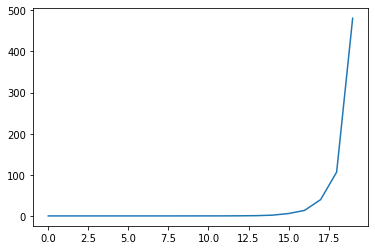

In [22]:
import time
import matplotlib.pyplot as plt

times = []
for n in range(1, 21):
    start = time.time()
    print(n, cut_rod(p, n))
    end = time.time()
    difference = end - start
    times.append(difference)

plt.plot(times)
plt.show()

## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

1 ([0, 1], [0, 1])
2 ([0, 1, 5], [0, 1, 2])
3 ([0, 1, 5, 8], [0, 1, 2, 3])
4 ([0, 1, 5, 8, 10], [0, 1, 2, 3, 2])
5 ([0, 1, 5, 8, 10, 13], [0, 1, 2, 3, 2, 2])
6 ([0, 1, 5, 8, 10, 13, 17], [0, 1, 2, 3, 2, 2, 6])
7 ([0, 1, 5, 8, 10, 13, 17, 18], [0, 1, 2, 3, 2, 2, 6, 1])
8 ([0, 1, 5, 8, 10, 13, 17, 18, 22], [0, 1, 2, 3, 2, 2, 6, 1, 2])
9 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3])
10 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10])
11 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30, 31], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10, 1])
12 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30, 31, 35], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10, 1, 2])
13 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30, 31, 35, 38], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10, 1, 2, 3])
14 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30, 31, 35, 38, 40], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10, 1, 2, 3, 2])
15 ([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30, 31, 35, 38, 40, 43], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10, 1, 2, 3, 2,

<function matplotlib.pyplot.show(*args, **kw)>

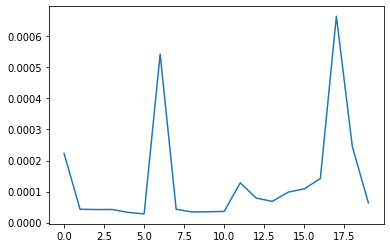

In [27]:
import matplotlib.pyplot as plt
ext_times = []
for n in range(1, 21):
    start = time.time()
    print(n, extended_bottom_up_cut_rod(p, n))
    end = time.time()
    difference = end - start
    ext_times.append(difference)

plt.plot(ext_times)
plt.show

## Question 4.

Contrast both curves. What can you conclude?

The non-dynamic cut_rod is stupendously inefficient.

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

YOUR ANSWER HERE

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

YOUR ANSWER HERE

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE